In [97]:
import h5py
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [105]:
filename='cross_H2-_ff.hdf5'
T0=3000
P0=1e1

In [106]:
with h5py.File(filename, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())

    lam = f['wave'][()]  # returns as a numpy array
    mol_name = 'H2'
    P = f['P'][()]*1e-6  # returns as a numpy array
    T = f['T'][()]  # returns as a numpy array
    xs = f['cross_sec'][()]  # returns as a numpy array

nlam=len(lam)
nT=len(T)
nP=len(P)
ng=1
print(len(xs[:,nT-1,nP-1]))
print(nlam,nP,nT)

Keys: <KeysViewHDF5 ['P', 'T', 'cross_sec', 'wave']>
1000
1000 23 48


In [100]:
filename='/Users/michielm/ARCiS/Data/Opacities/opacity_H2.fits'
hdul=fits.open(filename)
hdul.info()
lamH2=1e4*hdul[3].data
TH2=hdul[1].data
PH2=hdul[2].data
iT=np.argmin(np.abs(TH2-T0))
iP=np.argmin(np.abs(PH2-P0))
print(iT,iP)
print(len(TH2),len(PH2))
data=hdul[0].data
nlamH2=len(lamH2)
kappa=np.empty([nlamH2])
for i in range(0,nlam):
	kappa[i]=data[iP,iT,0,i]


Filename: /Users/michielm/ARCiS/Data/Opacities/opacity_H2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (1278, 25, 50, 50)   float64   
  1                1 ImageHDU         6   (50,)   float64   
  2                1 ImageHDU         6   (50,)   float64   
  3                1 ImageHDU         6   (1278,)   float64   
49 39
50 50


35 16


/var/folders/5j/mgjl7ymx1hb0nbl3mhndk72h0000gp/T/ipykernel_6652/3589452199.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.plot(lamH2,np.log10(kappa))


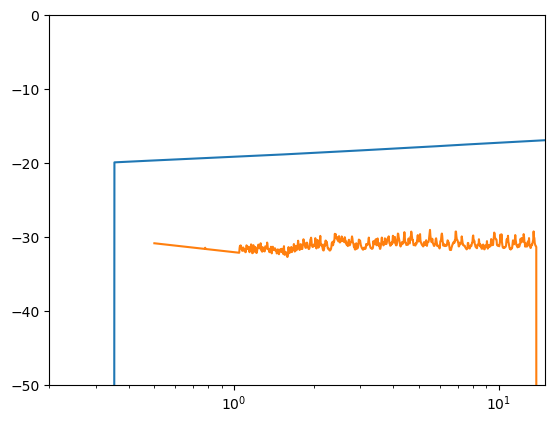

In [108]:
iT=np.argmin(np.abs(T-T0))
iP=np.argmin(np.abs(P-P0))
print(iT,iP)
plt.plot(lam*1e4,xs[:,iT,iP])
plt.plot(lamH2,np.log10(kappa))
plt.ylim(-50,0)

plt.xlim(0.2,15)
plt.xscale('log')

In [103]:
filename='freefree_H2.fits'
xsARC = np.ones([nP,nT,ng,nlam])

for ilam in range(0,nlam):
	for iP in range(0,nP):
		for iT in range(0,nT):
			xsARC[iP,iT,0,ilam]=10.0**xs[ilam,iT,iP]

lmin =lam[0]*lam[0]/np.sqrt(lam[0]*lam[1])
lmax =lam[nlam-1]*lam[nlam-1]/np.sqrt(lam[nlam-2]*lam[nlam-1])

hdr = fits.Header()
hdr['TMIN']=T[0]
hdr['TMAX']=T[nT-1]
hdr['PMIN']=P[0]
hdr['PMAX']=P[nP-1]
hdr['L_MIN']=lmin
hdr['L_MAX']=lmax
hdr['NT']=nT
hdr['NP']=nP
hdr['NLAM']=nlam
hdr['NG']=ng

primary_hdu = fits.PrimaryHDU(xsARC,header=hdr)
image_hdu = fits.ImageHDU(T)
image_hdu2 = fits.ImageHDU(P)
image_hdu3 = fits.ImageHDU(lam)

hdul = fits.HDUList([primary_hdu, image_hdu, image_hdu2,image_hdu3])

hdul.writeto(filename,overwrite=True)